In [1]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from arch import arch_model
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
start = '2010-01-01'
end = '2022-08-22'
df = web.DataReader('AAPL', 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425
...,...,...,...,...,...,...
2022-08-16,173.710007,171.660004,172.779999,173.029999,56377100.0,173.029999
2022-08-17,176.149994,172.570007,172.770004,174.550003,79542000.0,174.550003
2022-08-18,174.899994,173.119995,173.750000,174.149994,62290100.0,174.149994


In [4]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['Close'])

1. ADF :  1.1634886843172283
2. P-Value :  0.9957236570048336
3. Num Of Lags :  27
4. Num Of Observations Used For ADF Regression: 3154
5. Critical Values :
	 1% :  -3.4324250254012925
	 5% :  -2.862456818784834
	 10% :  -2.567258043948983


In [5]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Close'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10668.153, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10671.167, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10662.929, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10662.707, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10673.972, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10664.166, Time=0.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10664.389, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10666.157, Time=1.48 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10666.145, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 5.431 seconds


In [6]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(3182, 6)
(3152, 6) (30, 6)


In [14]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(7,1,4))
model=model.fit()
model.save('Arima_model.h2')

In [15]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)
pred.index=df.index[start:end+1]

3152    144.332760
3153    145.220945
3154    144.979709
3155    145.015013
3156    144.719798
3157    144.396936
3158    144.788912
3159    144.569132
3160    145.249174
3161    144.831317
3162    145.089476
3163    144.625886
3164    144.625702
3165    144.696632
3166    144.673922
3167    145.112557
3168    144.801043
3169    145.087591
3170    144.598195
3171    144.775955
3172    144.623152
3173    144.784991
3174    144.965388
3175    144.836318
3176    145.022129
3177    144.631118
3178    144.842825
3179    144.597393
3180    144.862303
3181    144.846109
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='Date'>

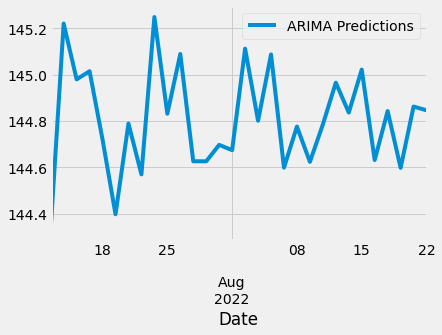

In [16]:
pred.plot(legend=True)


In [17]:
returns = 100 * df.Close.pct_change().dropna()

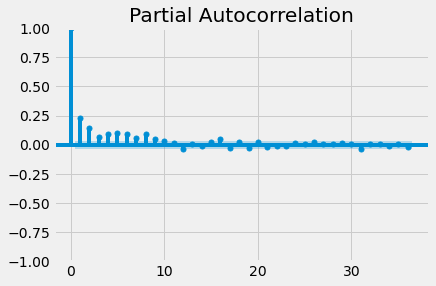

In [18]:
plot_pacf(returns**2)
plt.show()

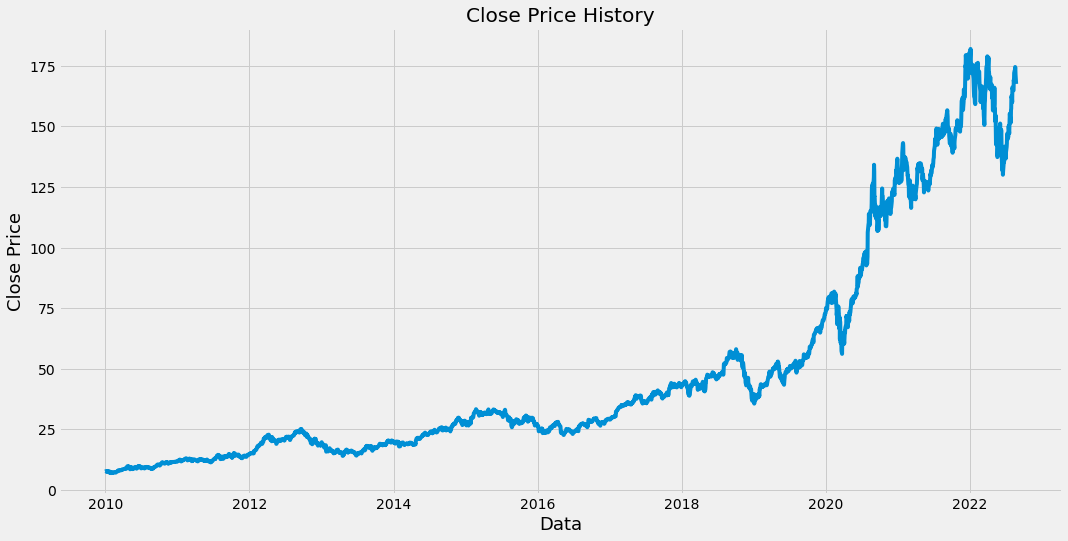

In [19]:
#visulaize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [20]:
ma50 = df.Close.rolling(50).mean()
ma50

Date
2009-12-31         NaN
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
                ...   
2022-08-16    149.7706
2022-08-17    150.3388
2022-08-18    150.8476
2022-08-19    151.3188
2022-08-22    151.8174
Name: Close, Length: 3182, dtype: float64

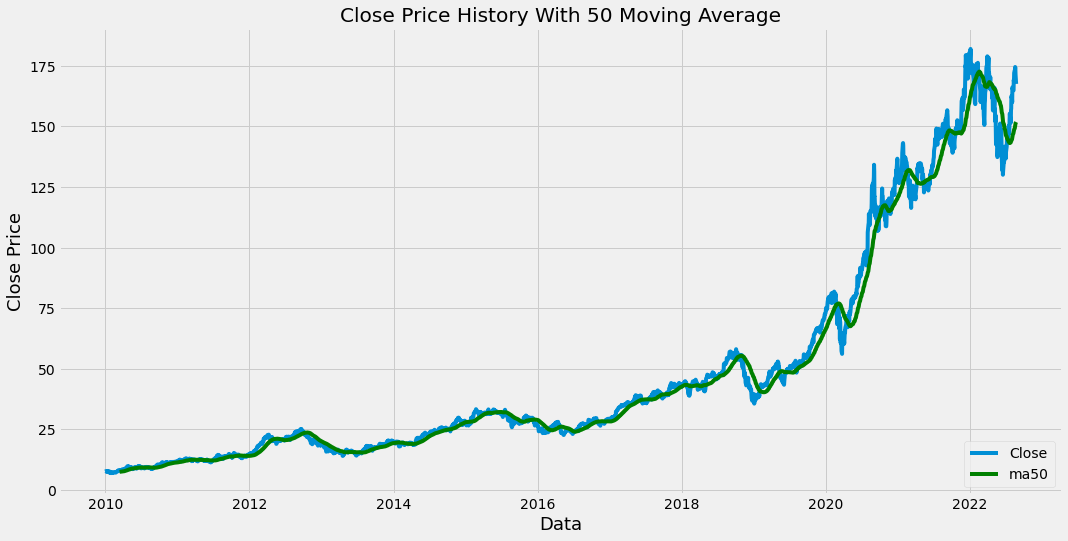

In [21]:
plt.figure(figsize=(16,8))
plt.title('Close Price History With 50 Moving Average')
plt.plot(df['Close'])
plt.plot(ma50, 'g')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Close','ma50'], loc='lower right')
plt.show()

In [22]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2009-12-31           NaN
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
                 ...    
2022-08-16    160.103801
2022-08-17    160.227551
2022-08-18    160.353500
2022-08-19    160.461000
2022-08-22    160.541400
Name: Close, Length: 3182, dtype: float64

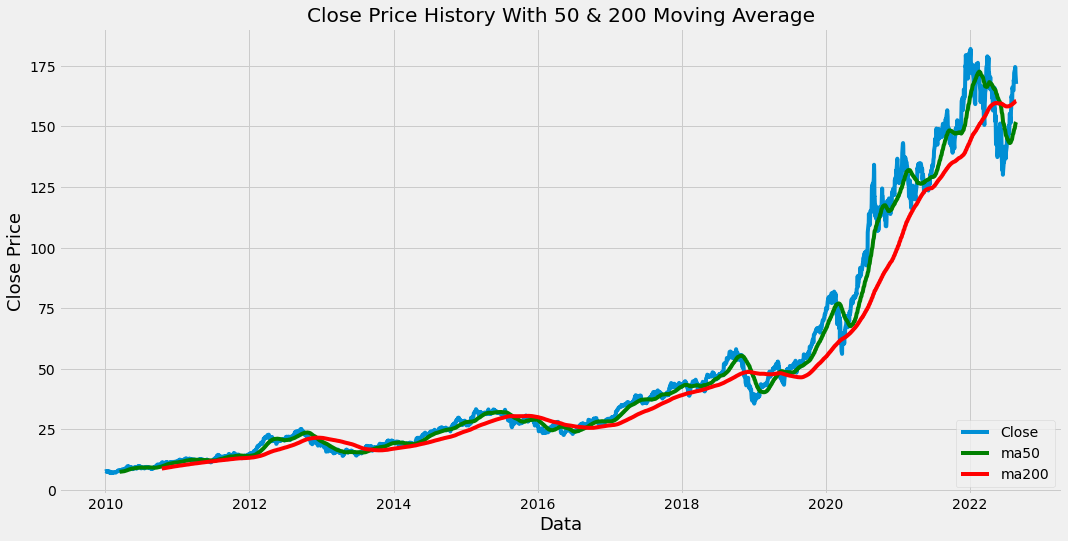

In [23]:
plt.figure(figsize=(16,8))
plt.title('Close Price History With 50 & 200 Moving Average')
plt.plot(df['Close'])
plt.plot(ma50, 'g')
plt.plot(ma200, 'r')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Close', 'ma50', 'ma200'], loc='lower right')
plt.show()

In [24]:
#creat a new dataframe with only the 'Close column'
data = df.filter(['Close'])

#convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2546

In [25]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00380895],
       [0.00447776],
       [0.00455321],
       ...,
       [0.95512445],
       [0.9401089 ],
       [0.91755695]])

In [26]:
#Creat the training data set
#Creat the scaled training data set
train_data  = scaled_data[0:training_data_len , :]
#Split the data set into x_train and y_train data sets
x_train = []
y_train =[]

for i in range(70, len(train_data)):
    x_train.append(train_data[i-70:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 71:
        print(x_train)
        print(y_train)
        print()

[array([3.80895151e-03, 4.47776362e-03, 4.55321042e-03, 3.85789270e-03,
       3.77836496e-03, 4.06383392e-03, 3.68253530e-03, 3.19519517e-03,
       3.79263868e-03, 3.54387631e-03, 2.83020666e-03, 4.68778577e-03,
       4.01286179e-03, 3.26656105e-03, 1.16225866e-03, 2.24703686e-03,
       2.83224576e-03, 3.22782354e-03, 1.47627233e-03, 2.03638039e-06,
       5.46463221e-04, 7.76876395e-04, 1.46403771e-03, 0.00000000e+00,
       6.95312283e-04, 4.22080672e-04, 8.44166789e-04, 6.25985509e-04,
       1.34985068e-03, 1.69853181e-03, 2.31432725e-03, 2.14100896e-03,
       2.21848942e-03, 1.96156791e-03, 1.70668550e-03, 1.02156329e-03,
       1.75562669e-03, 2.02885830e-03, 2.56308963e-03, 3.45416123e-03,
       3.42561379e-03, 3.52348256e-03, 3.80487330e-03, 5.48505863e-03,
       5.51156697e-03, 6.31495443e-03, 6.68606025e-03, 6.82063559e-03,
       7.04493690e-03, 6.48215813e-03, 6.60653796e-03, 6.53925029e-03,
       6.64732002e-03, 6.15794623e-03, 6.66771105e-03, 7.40380811e-03,
     

In [27]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2476, 70, 1)

In [29]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2476/2476 [==============================] - 83s 32ms/step - loss: 1.5490e-04


In [32]:
model.save('keras_model.h1')

INFO:tensorflow:Assets written to: keras_model.h1\assets


INFO:tensorflow:Assets written to: keras_model.h1\assets


In [33]:
#Create the testing data set
test_data = scaled_data[training_data_len - 70: , :]
#Creat the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(70, len(test_data)):
    x_test.append(test_data[i-70:i, 0])

In [34]:
#Convert the data into numpy array
x_test = np.array(x_test)

In [35]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [37]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5.037979809743054

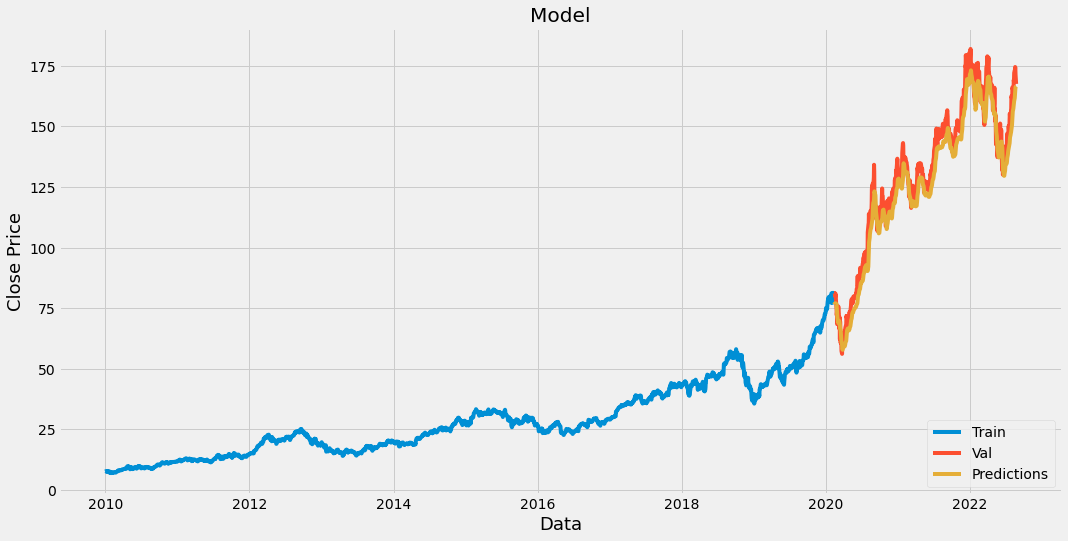

In [38]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [39]:
#Show the valid and predicted price 
valid

,Close,Predictions
Date,,
2020-02-13,81.217499,76.526016
2020-02-14,81.237503,76.788658
2020-02-18,79.750000,77.005737
2020-02-19,80.904999,76.973190
2020-02-20,80.074997,76.983009
...,...,...
2022-08-16,173.029999,163.065369
2022-08-17,174.550003,164.255264
2022-08-18,174.149994,165.428360


In [40]:
start = '2010-01-01'
end = '2022-08-11'
df = web.DataReader('AAPL', 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526019
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537305
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426
...,...,...,...,...,...,...
2022-08-05,165.850006,163.000000,163.210007,165.350006,56646600.0,165.350006
2022-08-08,167.809998,164.199997,166.369995,164.869995,60276900.0,164.869995
2022-08-09,165.820007,163.250000,164.020004,164.919998,63135500.0,164.919998


In [41]:
df=df.reset_index ()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526019
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537305
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [42]:
Close = df['Close']
Close

0         7.526071
1         7.643214
2         7.656429
3         7.534643
4         7.520714
           ...    
3170    165.350006
3171    164.869995
3172    164.919998
3173    169.240005
3174    168.490005
Name: Close, Length: 3175, dtype: float64

In [43]:
Date = df['Date']
Date

0      2009-12-31
1      2010-01-04
2      2010-01-05
3      2010-01-06
4      2010-01-07
          ...    
3170   2022-08-05
3171   2022-08-08
3172   2022-08-09
3173   2022-08-10
3174   2022-08-11
Name: Date, Length: 3175, dtype: datetime64[ns]

In [31]:
Date2 = Date[int(len(Date)*0.99): len(Date)]

In [32]:
returns = 100 * df.Close.pct_change().dropna()

In [33]:
returns2 = returns[int(len(returns)*0.99): len(returns)]

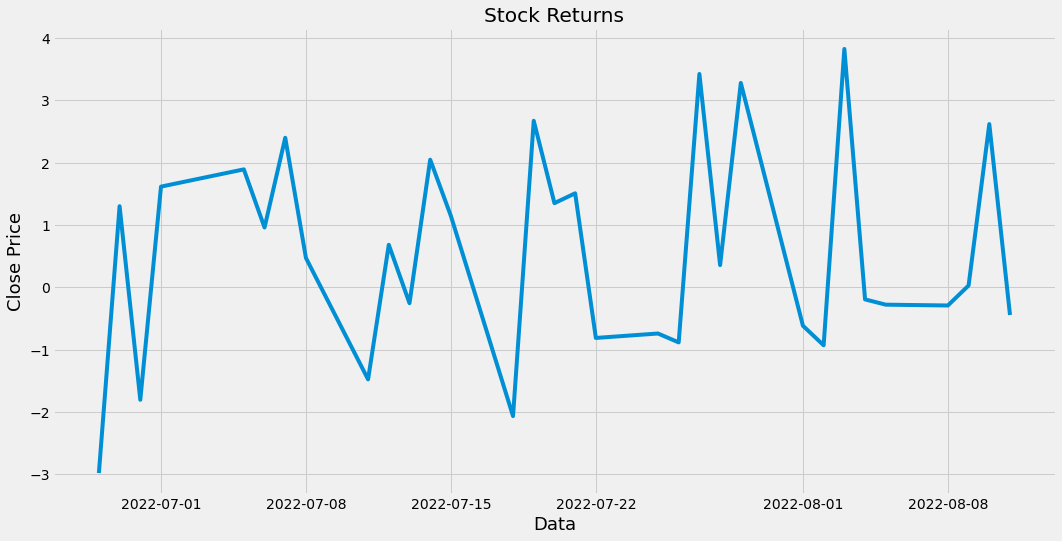

In [34]:
#visulaize the closing price history
plt.figure(figsize=(16,8))
plt.title('Stock Returns')
plt.plot(Date2, returns2)
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [35]:
ema_period = 50  # defining the ema period to 10

# calculating sma in pandas using df.rolling().mean() applied on the close price
# rolling() defines the window for the period where ema_period is passed
# .ewm() creates an exponential weighted window with 'span is equal to our ema_period'
ema50 = df['Close'].ewm(span=ema_period, min_periods=ema_period).mean()
ema50

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3170    151.504928
3171    152.029048
3172    152.534576
3173    153.189691
3174    153.789703
Name: Close, Length: 3175, dtype: float64

In [36]:
ema_period = 200  # defining the ema period to 10

# calculating sma in pandas using df.rolling().mean() applied on the close price
# rolling() defines the window for the period where ema_period is passed
# .ewm() creates an exponential weighted window with 'span is equal to our ema_period'
ema200 = df['Close'].ewm(span=ema_period, min_periods=ema_period).mean()
ema200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3170    153.081287
3171    153.198588
3172    153.315219
3173    153.473674
3174    153.623091
Name: Close, Length: 3175, dtype: float64

In [37]:
ema200 = ema200[int(len(ema200)*0.99): len(ema200)]

In [38]:
ema50 = ema50[int(len(ema50)*0.99): len(ema50)]

In [39]:
Close = Close[int(len(Close)*0.99): len(Close)]

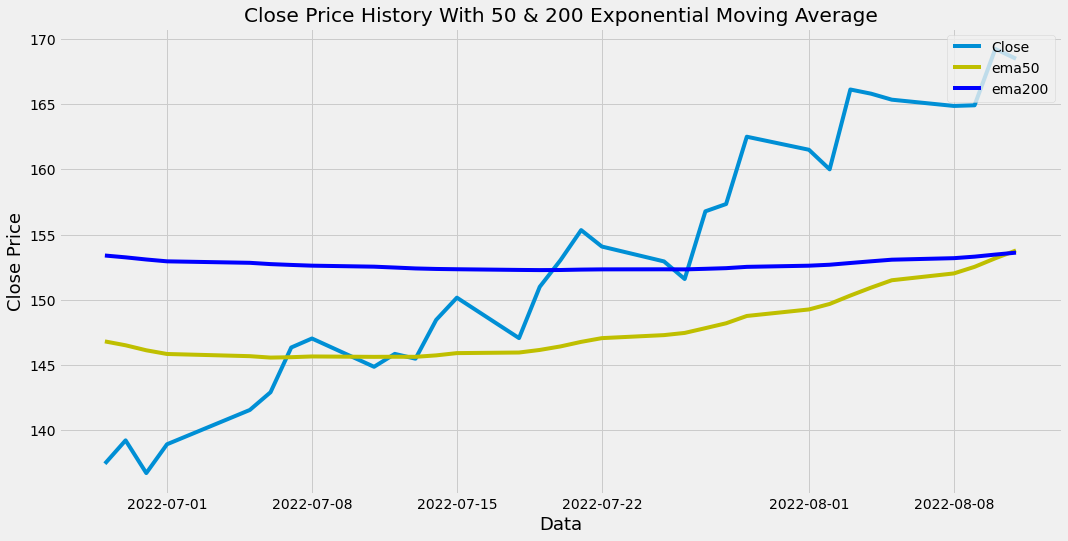

In [40]:
plt.figure(figsize=(16,8))
plt.title('Close Price History With 50 & 200 Exponential Moving Average')
plt.plot(Date2, Close)
plt.plot(Date2, ema50, 'y')
plt.plot(Date2, ema200, 'b')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Close', 'ema50', 'ema200'], loc='upper right')
plt.show()

In [41]:
ma50 = df.Close.rolling(50).mean()
ma50 = ma50[int(len(ma50)*0.99): len(ma50)]

In [42]:
ma200 = df.Close.rolling(200).mean()
ma200 = ma200[int(len(ma200)*0.99): len(ma200)]

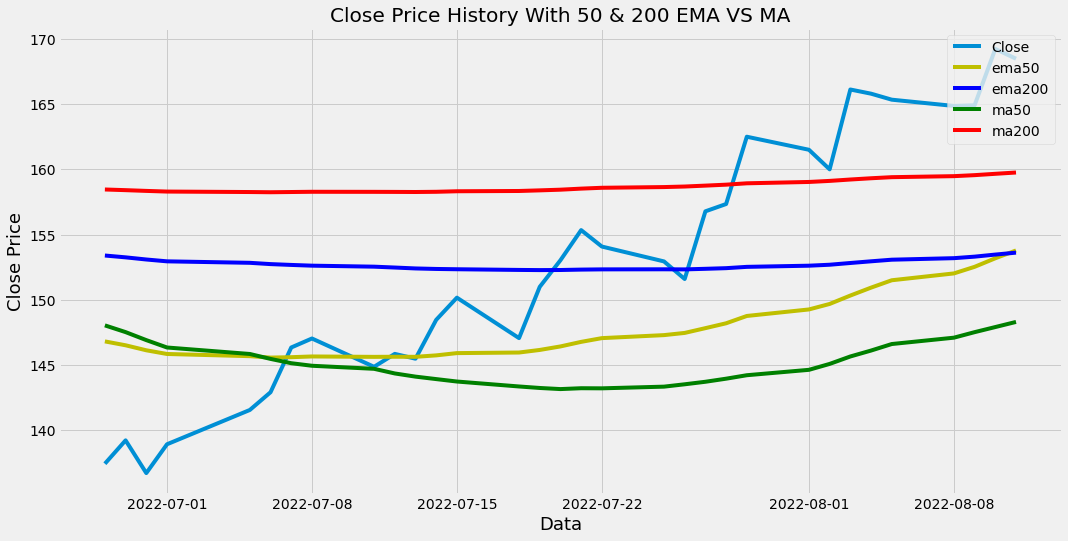

In [43]:
plt.figure(figsize=(16,8))
plt.title('Close Price History With 50 & 200 EMA VS MA')
plt.plot(Date2, Close)
plt.plot(Date2, ema50, 'y')
plt.plot(Date2, ema200, 'b')
plt.plot(Date2, ma50, 'g')
plt.plot(Date2, ma200, 'r')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Close', 'ema50', 'ema200', 'ma50', 'ma200'], loc='upper right')
plt.show()

In [44]:
atr_period = 14  # defining the atr period to 14

# calculating the range of each candle
range = df['High'] - df['Low']

# calculating the average value of ranges
atr_14 = range.rolling(atr_period).mean()

In [45]:
atr_14 = atr_14[int(len(atr_14)*0.99): len(atr_14)]

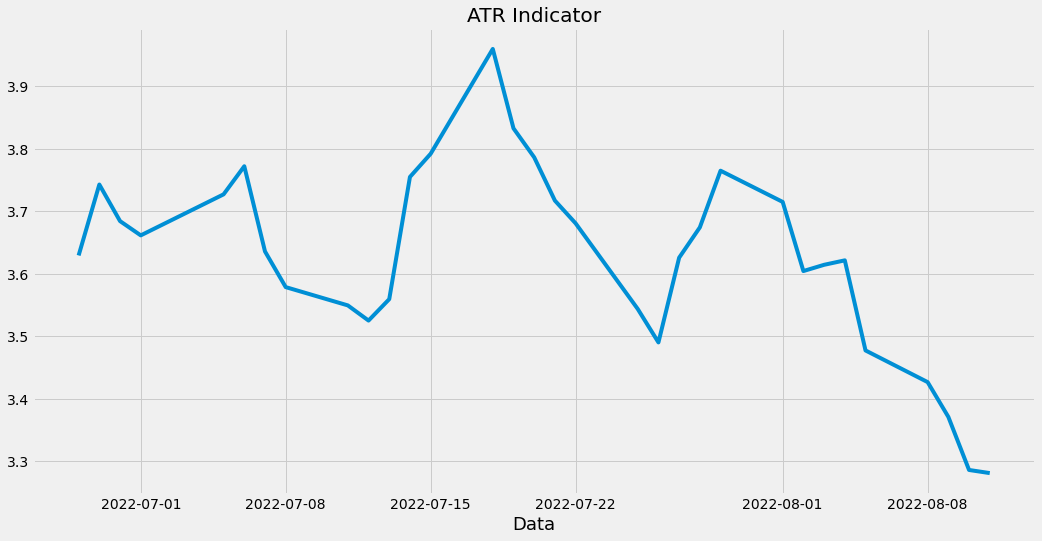

In [46]:
# plotting the ATR Indicator
plt.figure(figsize=(16,8))
plt.title('ATR Indicator')
plt.plot(Date2, atr_14)
plt.xlabel('Data', fontsize=18)
plt.show()

In [47]:
# setting the RSI Period
rsi_period = 14

# to calculate RSI, we first need to calculate the exponential weighted aveage gain and loss during the period
df['gain'] = (df['Close'] - df['Open']).apply(lambda x: x if x > 0 else 0)
df['loss'] = (df['Close'] - df['Open']).apply(lambda x: -x if x < 0 else 0)

# here we use the same formula to calculate Exponential Moving Average
df['ema_gain'] = df['gain'].ewm(span=rsi_period, min_periods=rsi_period).mean()
df['ema_loss'] = df['loss'].ewm(span=rsi_period, min_periods=rsi_period).mean()

# the Relative Strength is the ratio between the exponential avg gain divided by the exponential avg loss
df['rs'] = df['ema_gain'] / df['ema_loss']

# the RSI is calculated based on the Relative Strength using the following formula
rsi_14 = 100 - (100 / (df['rs'] + 1))
rsi_14

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3170    86.144552
3171    76.002697
3172    77.811202
3173    80.717597
3174    70.061086
Name: rs, Length: 3175, dtype: float64

In [48]:
rsi_14 = rsi_14[int(len(rsi_14)*0.99): len(rsi_14)]

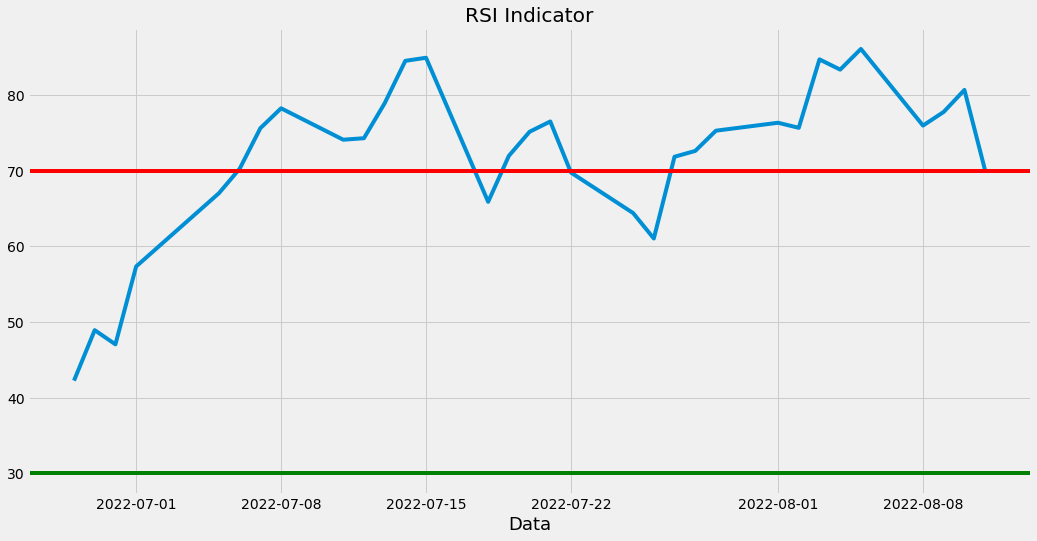

In [49]:
# plotting the RSI Indicator
plt.figure(figsize=(16,8))
plt.title('RSI Indicator')
plt.plot(Date2, rsi_14)
plt.xlabel('Data', fontsize=18)
# RSI commonly uses oversold and overbought levels, usually at 70 and 30
overbought_level = 70
orversold_level = 30

plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='g', linestyle='-')
plt.show()

In [50]:
# to calculate the previous High/Low, we can simply use shift() to check values of previous rows
prev_high = df['High'].shift(1)
prev_low = df['Low'].shift(1)
prev_high = prev_high[int(len(prev_high)*0.99): len(prev_high)]
prev_low = prev_low[int(len(prev_low)*0.99): len(prev_low)]

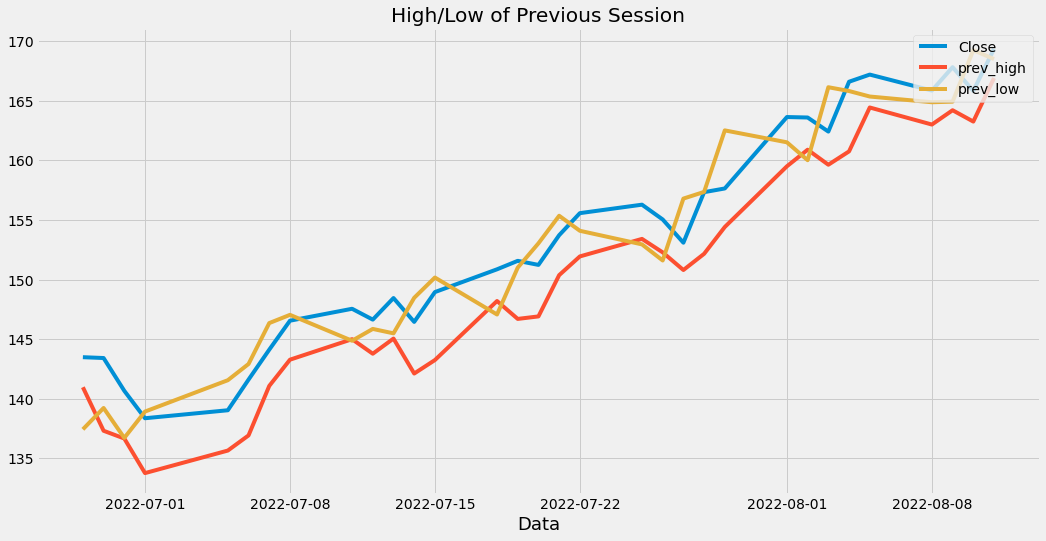

In [51]:
# High/Low of Previous Session
plt.figure(figsize=(16,8))
plt.title('High/Low of Previous Session')
plt.plot(Date2, prev_high)
plt.plot(Date2, prev_low)
plt.plot(Date2, Close)
plt.xlabel('Data', fontsize=18)
plt.legend(['Close', 'prev_high', 'prev_low'], loc='upper right')
plt.show()

In [52]:
# setting the deviation period
deviation_period = 20

# simple way to calculate Standard Deviation is to use std() 
std_20 = df['Close'].rolling(20).std()
std_201 = std_20[int(len(std_20)*0.99): len(std_20)]

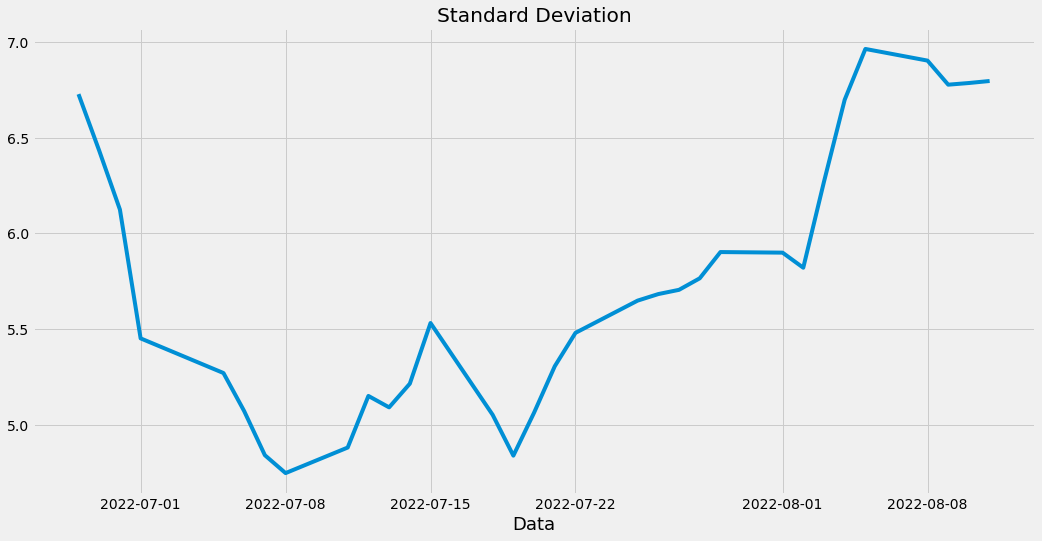

In [53]:
# plotting the deviation period
plt.figure(figsize=(16,8))
plt.title('Standard Deviation')
plt.plot( Date2, std_201)
plt.xlabel('Data', fontsize=18)
plt.show()

In [54]:
# setting SMA Period to 20
sma_period = 20

# calculating individual components of Bollinger Bands
sma_20 = df['Close'].rolling(sma_period).mean()
upper_band_20 = sma_20 + 2 * std_20
lower_band_20 = sma_20 - 2 * std_20

In [55]:
upper_band_20 = upper_band_20[int(len(upper_band_20)*0.99): len(upper_band_20)]
lower_band_20 = lower_band_20[int(len(lower_band_20)*0.99): len(lower_band_20)]
sma_20 = sma_20[int(len(sma_20)*0.99): len(sma_20)]

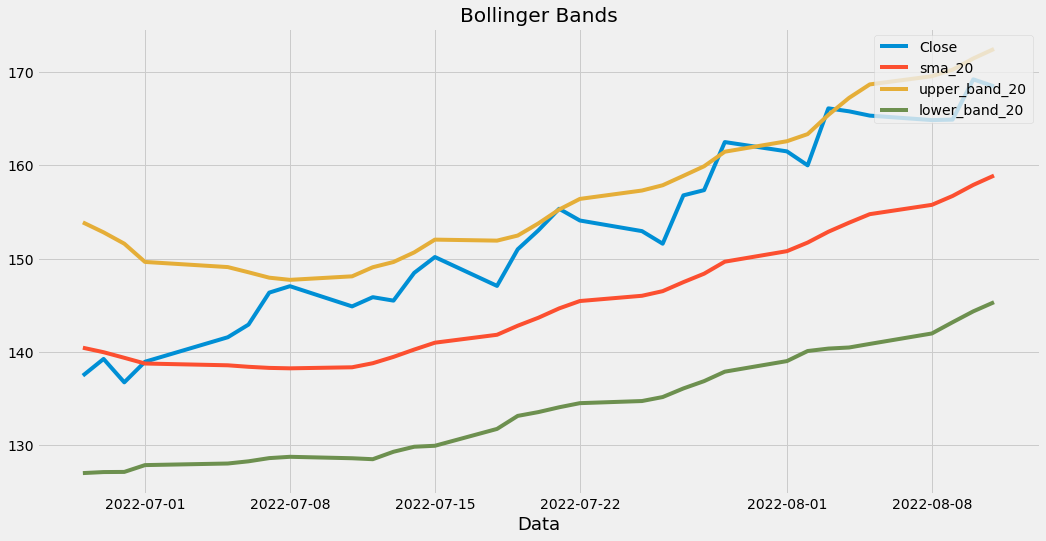

In [56]:
# plotting the Bollinger Bands
plt.figure(figsize=(16,8))
plt.title('Bollinger Bands')
plt.plot(Date2, Close)
plt.plot(Date2, sma_20)
plt.plot(Date2, upper_band_20)
plt.plot(Date2, lower_band_20)
plt.xlabel('Data', fontsize=18)
plt.legend(['Close','sma_20', 'upper_band_20', 'lower_band_20'], loc='upper right')
plt.show()

In [57]:
# setting Moving Average Convergence/Divergence (MACD)
# setting the EMA periods
fast_ema_period = 12
slow_ema_period = 26

# calculating EMAs
df['ema_12'] = df['Close'].ewm(span=fast_ema_period, min_periods=fast_ema_period).mean()
df['ema_26'] = df['Close'].ewm(span=slow_ema_period, min_periods=slow_ema_period).mean()

# calculating MACD by subtracting the EMAs
macd = df['ema_26'] - df['ema_12']

# calculating to Signal Line by taking the EMA of the MACD
signal_period = 9
macd_signal = macd.ewm(span=signal_period, min_periods=signal_period).mean()
macd = macd[int(len(macd)*0.99): len(macd)]
macd_signal = macd_signal[int(len(macd_signal)*0.99): len(macd_signal)]

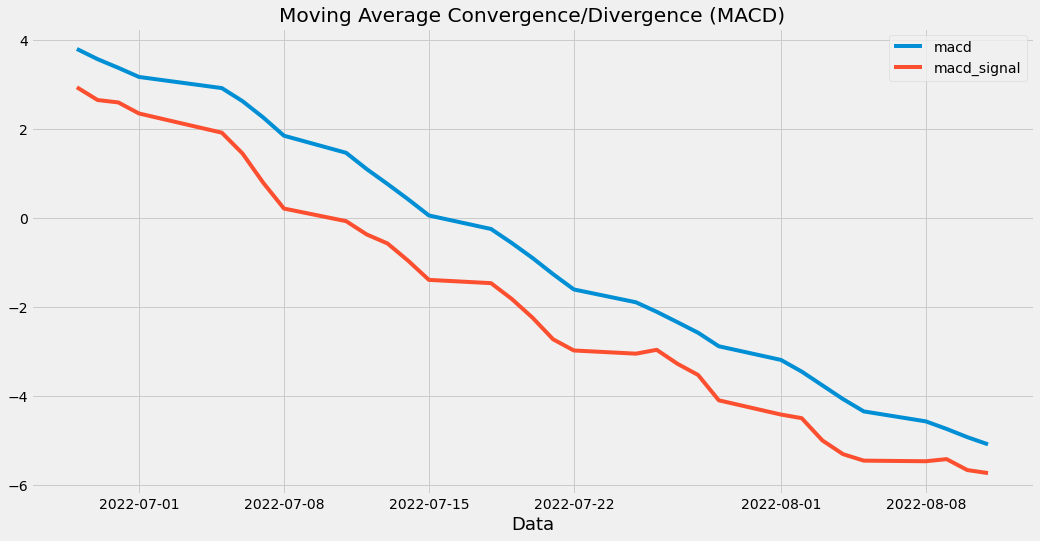

In [58]:
# plotting the Moving Average Convergence/Divergence (MACD)
plt.figure(figsize=(16,8))
plt.title('Moving Average Convergence/Divergence (MACD)')
plt.plot(Date2, macd_signal)
plt.plot(Date2, macd)
plt.xlabel('Data', fontsize=18)
plt.legend(['macd', 'macd_signal'], loc='upper right')
plt.show()

In [59]:
# setting the SMA Periods
fast_sma_period = 10
slow_sma_period = 20

# calculating fast SMA
df['sma_10'] = df['Close'].rolling(fast_sma_period).mean()

# To find crossovers, previous SMA value is necessary using shift()
df['prev_sma_10'] = df['sma_10'].shift(1)

# calculating slow SMA
df['sma_20'] = df['Close'].rolling(slow_sma_period).mean()

# function to find crossovers
def sma_cross(row):
    
    bullish_crossover = row['sma_10'] >= row['sma_20'] and row['prev_sma_10'] < row['sma_20']
    bearish_crossover = row['sma_10'] <= row['sma_20'] and row['prev_sma_10'] > row['sma_20']
    
    if bullish_crossover or bearish_crossover:
        return True

# applying function to dataframe
df['crossover'] = df.apply(sma_cross, axis=1)

In [60]:
sma_20 = df['sma_20']
sma_10 = df['sma_10']
sma_20 = sma_20[int(len(sma_20)*0.99): len(sma_20)]
sma_10 = sma_10[int(len(sma_10)*0.99): len(sma_10)]

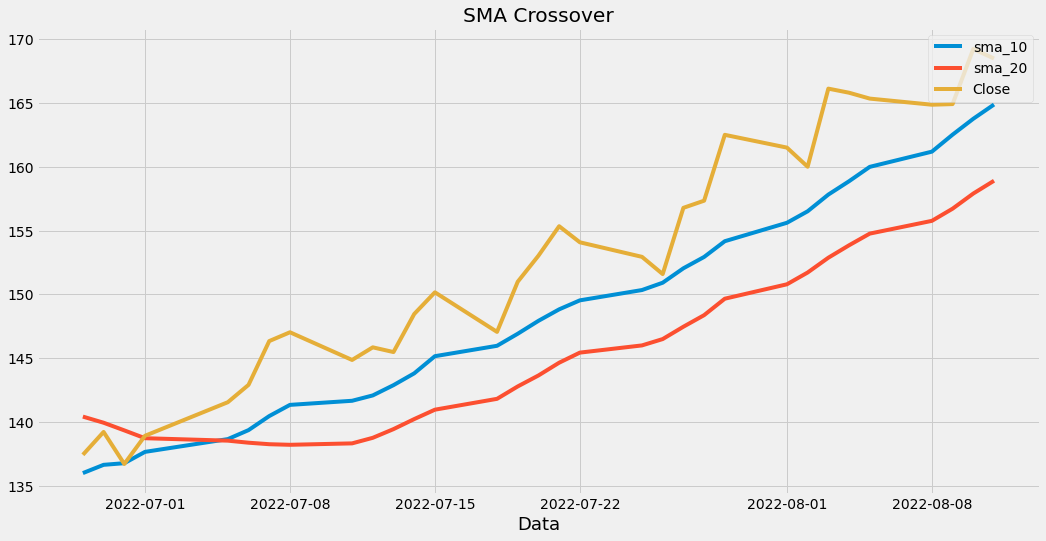

In [61]:
# plotting the SMA Crossover
plt.figure(figsize=(16,8))
plt.title('SMA Crossover')
plt.plot(Date2, sma_10)
plt.plot(Date2, sma_20)
plt.plot(Date2, Close)
plt.xlabel('Data', fontsize=18)
plt.legend(['sma_10','sma_20', 'Close'], loc='upper right')
plt.show()

In [62]:
# setting the period
stochastic_period = 14

# calculating maximum high and minimum low for the period
df['14_period_low'] = df['Low'].rolling(stochastic_period).min()
df['14_period_high'] = df['High'].rolling(stochastic_period).max()

# formula to calculate the Stochastic Oscillator
stoch_osc = (df['Close'] - df['14_period_low']) / (df['14_period_high'] - df['14_period_low'])
stoch_osc = stoch_osc[int(len(stoch_osc)*0.99): len(stoch_osc)]

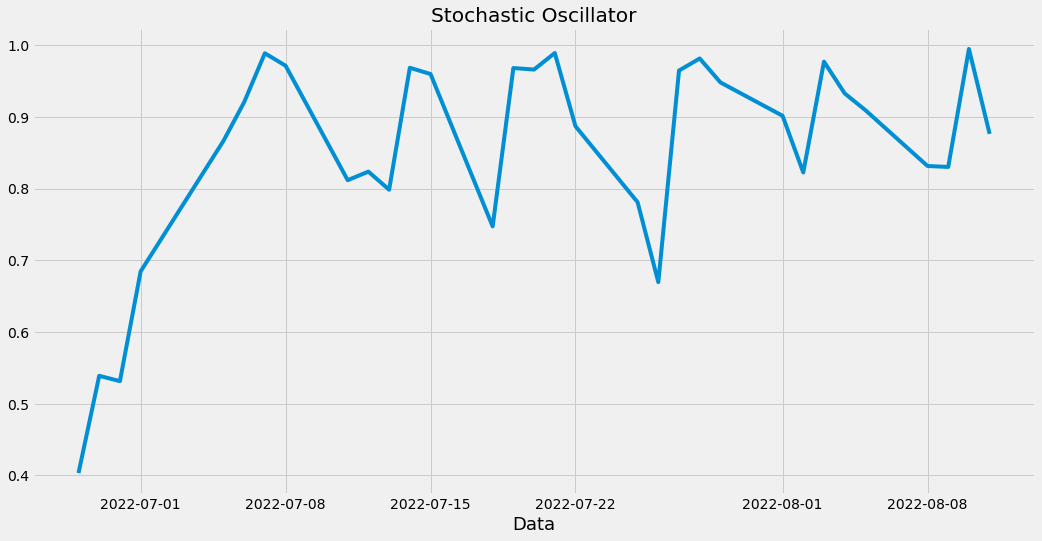

In [63]:
# Stochastic Oscillator
plt.figure(figsize=(16,8))
plt.title('Stochastic Oscillator')
plt.plot(Date2, stoch_osc)
plt.xlabel('Data', fontsize=18)
plt.show()